In [8]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np



peyton_args = {
     "Number_of_Excitons": 1,
     "number_of_boson_levels": 2,
     "boson_energy_ev": 0.5 / 3.6749322175665e-2, #0375 / 3.6749322175665e-2,
     "exciton_energy_ev" : 0.5 / 3.6749322175665e-2, #0375 / 3.6749322175665e-2,
     "exciton_boson_coupling_ev" : 0.02 / 3.6749322175665e-2,
     "boson_spontaneous_emission_rate_mev" : 0.0, #0.15e3,
     "exciton_spontaneous_emission_rate_mev" : 0.,
     "exciton_dephasing_rate_mev" : 0.,
     "time_step_au" : 1.0
    
}

sf = wptherml.SpectrumFactory()

# instantiate cases
test_1 = sf.spectrum_factory("Spin-Boson", peyton_args)

Energy Eigenvalues in atomic units are
[0.25 0.73 0.77 1.25]
Energy eigenvalues in eV are
[ 6.80284656 19.86431196 20.95276741 34.01423281]


In [9]:
# set the spin spontaneous emission rate consisten with Peytons of 5e-7
test_1.exciton_spontaneous_emission_rate_au = 5e-7

# set the spin dephasing rate consisten with Peytons 1e-9
test_1.exciton_dephasing_rate_au = 0.

Now we will initialize the state as $|gge\rangle$ where the cavity is in the ground state, the first spin is in the ground state, and the second spin is in the excited state.  We will compute the dynamics and store the populations after 1000 time stetps.

In [10]:
initial_cav = np.array([[1],[0]])
initial_sp  = np.array([[0],[1]])


# construct initial composite state
initial_ket = np.kron(initial_cav, initial_sp)

print("Initial state")
print(initial_ket)

# compute initial density matrix of composite system
initial_rho = np.dot(initial_ket, np.conj(initial_ket).T)

# print initial rho
print("Initial density matrix")
print(initial_rho)

Initial state
[[0]
 [1]
 [0]
 [0]]
Initial density matrix
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [11]:
t = []
gg = []
ge = []
eg = []

# set initial density matrix
test_1.rho = initial_rho

for i in range(1001):
    test_1.rk4_update_on_rho()
    t.append(i)
    gg.append(np.real(test_1.rho[0,0]))
    ge.append(np.real(test_1.rho[1,1]))
    eg.append(np.real(test_1.rho[2,2]))



print("Final density matrix")
print(test_1.rho)
    

Final density matrix
[[2.54704047e-04+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         1.51857242e-01+0.j
  0.00000000e+00+0.35882855j 0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00-0.35882855j
  8.47888054e-01+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]]


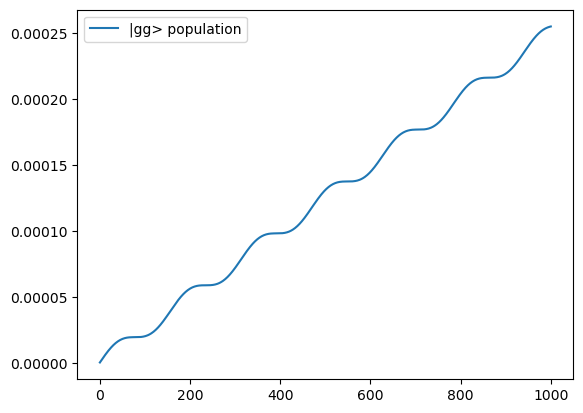

In [13]:
plt.plot(t, gg, label="|gg> population")
#plt.plot(t, ge, label="|ge> population")
#plt.plot(t, eg, label="|eg> population")
plt.legend()
plt.show()